In [277]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial import distance

## Reading in Data

In [278]:
df = pd.read_csv("archive/data.csv")
df_artist = pd.read_csv("archive/data_by_artist.csv")
df_genres = pd.read_csv("archive/data_by_genres.csv")
df_year = pd.read_csv("archive/data_by_year.csv")
df_w_genres = pd.read_csv("archive/data_w_genres.csv")

In [279]:
df_genres.shape

(2664, 14)

In [280]:
df_w_genres.head()

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres
0,"""Cats"" 1981 Original London Cast",0.575083,0.442750,247260.000000,0.386336,0.022717,0.287708,-14.205417,0.180675,115.983500,0.334433,38.000000,5,1,12,['show tunes']
1,"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,33.076923,5,1,26,[]
2,"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.285714,0,1,7,[]
3,"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.444444,0,1,27,[]
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.605444,0.437333,232428.111111,0.429333,0.037534,0.216111,-11.447222,0.086000,120.329667,0.458667,42.555556,11,1,9,[]


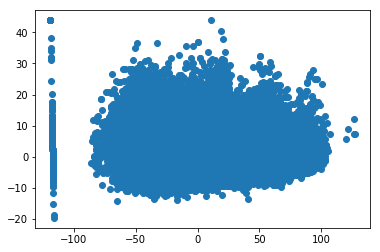

In [281]:
# Reducing data down to the columns of interest for pca
# I do not include explicit because that is not available in the genre aggregate data and I need the data to be consistent
X = df[['acousticness', 
       'danceability',
       'energy',
       'danceability', 
       'instrumentalness', 
       'key', 
       'liveness', 
       'loudness',
       'mode', 
       'speechiness', 
       'tempo']]

# Created this so I could see if there were better clusters with less data, the data staus consistently blob-like
# X = df[['acousticness', 
#        'danceability',
#        'energy',
#        'danceability', 
#        'instrumentalness', 
#        'liveness', 
#        'loudness',
#        'speechiness', 
#        'tempo']]

#Performing PCA to see what's going on
pca = PCA(n_components=2)
#reducing data down to 2d and plotting it
X_2d = pca.fit_transform(X)
plt.scatter([i[0] for i in X_2d], [i[1] for i in X_2d])


The fraction of the total variance explained by the first 1 principal component(s) is 0.9559172718352911
The fraction of the total variance explained by the first 2 principal component(s) is 0.9869964091036523
The fraction of the total variance explained by the first 3 principal component(s) is 0.9994804673118499
The fraction of the total variance explained by the first 4 principal component(s) is 0.9996874673689221
The fraction of the total variance explained by the first 5 principal component(s) is 0.9998016328479032
The fraction of the total variance explained by the first 6 principal component(s) is 0.9998827510357381
The fraction of the total variance explained by the first 7 principal component(s) is 0.9999353503708329
The fraction of the total variance explained by the first 8 principal component(s) is 0.9999683055669845
The fraction of the total variance explained by the first 9 principal component(s) is 0.9999860619777616
The fraction of the total variance explained by the fir

Text(0.5,1,'Fraction of total variance vs. number of principal components')

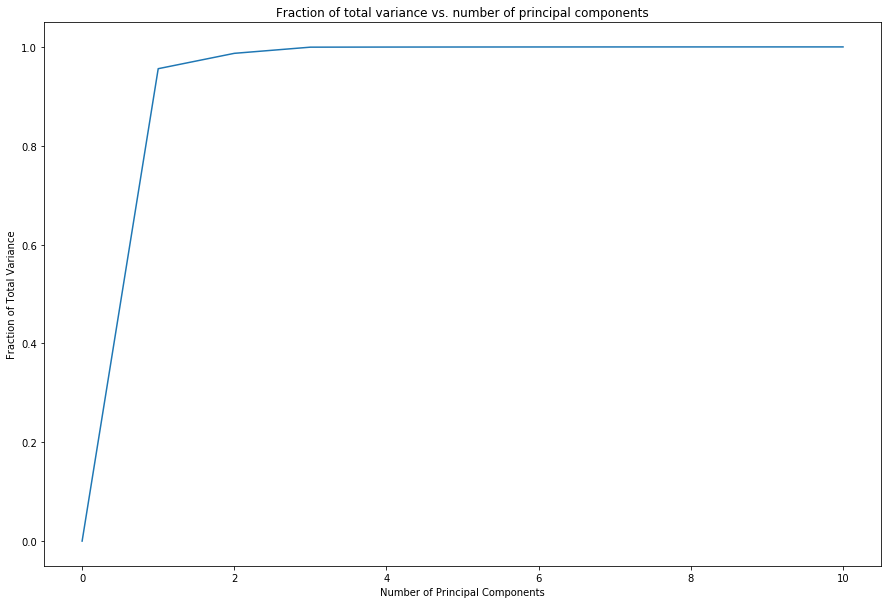

In [282]:
#Creating new PCA for visualizing explained variance for principle components
pca2 = PCA()
pca2.fit(X)
    
ks = range(1,12)
ratios = pca2.explained_variance_ratio_
#print(ratios)
for k in ks:
     #Sanity check to make sure the splicing is getting correct length
    #print(len(ratios[:k]))
    k_ratio = sum(ratios[:k])
    print(f"The fraction of the total variance explained by the first {k} principal component(s) is " + str(k_ratio))

summed_ratios = [sum(ratios[:i]) for i in range(len(ratios))]
plt.figure(figsize=(15, 10))
plt.plot(range(len(ratios)), summed_ratios)
plt.xlabel("Number of Principal Components")
plt.ylabel("Fraction of Total Variance")
plt.title("Fraction of total variance vs. number of principal components")

In two dimensions data is one giant blob with a left line

In [292]:
#Creating a function to plot PCA
def plot_pca():
    with plt.style.context('seaborn-whitegrid'):
        plt.figure(figsize=(15, 10))
         
        plt.scatter([i[0] for i in X_2d], [i[1] for i in X_2d], c = 'b')

        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        #plt.legend()
        plt.title("Principal Components 1 and 2")
        plt.tight_layout()
        


In [293]:
#Creating a function to plot kmeans and circles on top of the pca graph 
def plot_kmeans():
    plt.plot(centers_2d[:,0], centers_2d[:,1], 'ro', label  = "centroid")

    for ind,i in zip(kmeans.labels_,centers_2d):
        #print(ind)
        
       
        #print(np.where(kmeans.labels_==ind)[0])
        class_inds=np.where(kmeans.labels_==ind)[0]
        X_class = X_2d[class_inds]

        dists = metrics.pairwise_distances([i], X_class)

        max_dist=np.max(dists)
        #print(max_dist)
        plt.gca().add_artist(plt.Circle(i, max_dist, fill=False))
        plt.legend()

Using this list of genres via https://examples.yourdictionary.com/major-types-of-music-from-around-the-world.html as "Top Music Genres In the World" : Classical, Country, Electronic dance music (EDM), Hip-hop ,Indie rock ,Jazz, K-pop, Metal, Oldies, Pop, Rap, Rhythm & blues (R&B), Rock

In [294]:
#Using 12 because that's the number of top genres described above, excluding oldies since that isn't a spotify gebre
kmeans = KMeans(n_clusters= 12)
kmeans.fit(X)

#reducing down the centers into 2d so they can be plotted along with our reduced data
centers = kmeans.cluster_centers_
centers_2d = pca.transform(centers)
centers_2d

array([[-1.03689254e+01,  1.26131853e-01],
       [ 3.94589729e+01, -8.78207740e-01],
       [-4.90276040e+01,  4.88627238e+00],
       [ 1.07937283e+00, -5.84452245e-01],
       [-2.19548610e+01, -3.43695320e+00],
       [ 7.98418774e+01,  1.51395041e+00],
       [ 5.69184348e+01,  1.52384261e+00],
       [ 2.45675442e+01,  9.09862828e-02],
       [ 1.22928413e+01, -1.00246485e-01],
       [-3.68041120e+01, -2.55405441e+00],
       [-2.94968033e+01,  7.48622532e+00],
       [-1.08642796e+02,  5.66396301e+00]])

## Plotting with 2d clusters (when kmeans is trying to fit 2-d data instead of 11-d data)

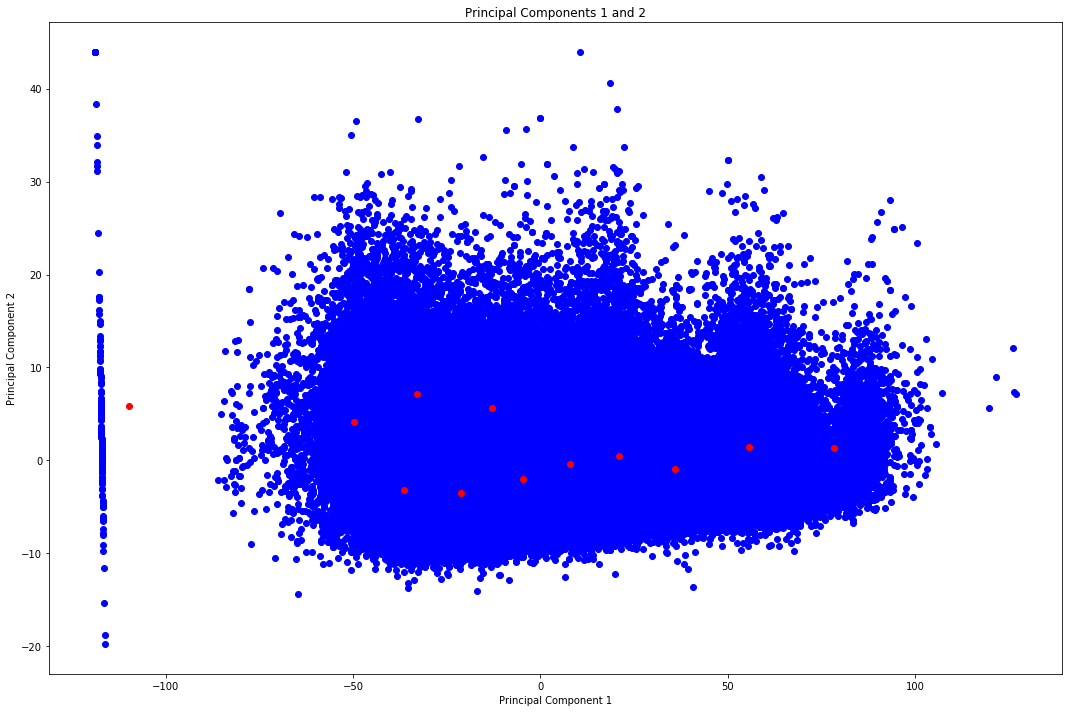

In [295]:
kmeans_2d = KMeans(n_clusters = 12)
kmeans_2d.fit(X_2d)

centers_2dreal = kmeans_2d.cluster_centers_
centers_2dreal

plt.figure(figsize=(15, 10))
         
plt.scatter([i[0] for i in X_2d], [i[1] for i in X_2d], c = 'b')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
        #plt.legend()
plt.title("Principal Components 1 and 2")
plt.tight_layout()

plt.plot(centers_2dreal[:,0], centers_2dreal[:,1], 'ro', label  = "centroid")

The clusters are more or less the same even when being done in 2d, this makes sense by the explained variance chart as we see that explained variance caps out at around 2 principle components

In [296]:
#Using 12 because that's the number of top genres described above, excluding oldies since that isn't a spotify gebre
kmeans = KMeans(n_clusters= 12)
kmeans.fit(X)

#reducing down the centers into 2d so they can be plotted along with our reduced data
centers = kmeans.cluster_centers_
centers_2d = pca.transform(centers)
centers_2d

array([[  55.01265668,    1.25990614],
       [  -7.99365174,    0.18365123],
       [ -36.44093267,   -2.44118358],
       [  19.27086854,   -1.68550321],
       [  77.87384711,    1.4277837 ],
       [ -48.69040032,    4.90841681],
       [   4.70196124,   -2.10786422],
       [ -21.00946773,   -3.33207094],
       [ -28.37429153,    7.41928409],
       [-108.48929316,    5.64782549],
       [  11.96941102,    7.86696765],
       [  34.3037985 ,   -0.60571688]])

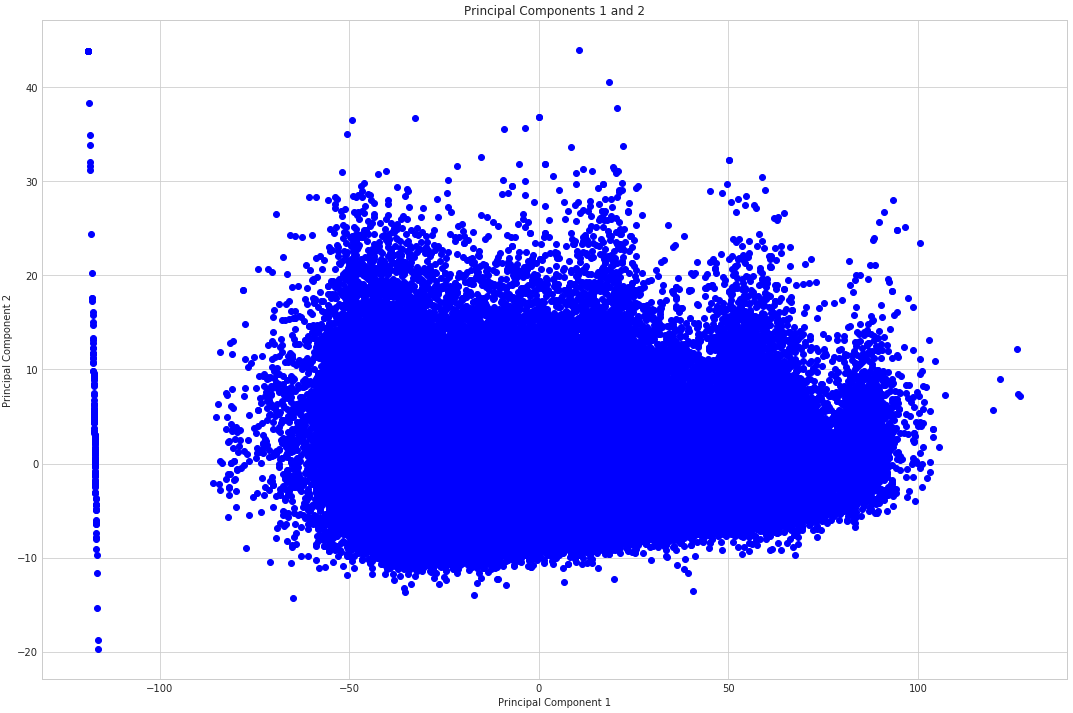

In [297]:
#making sure pca function works on its own
plot_pca()

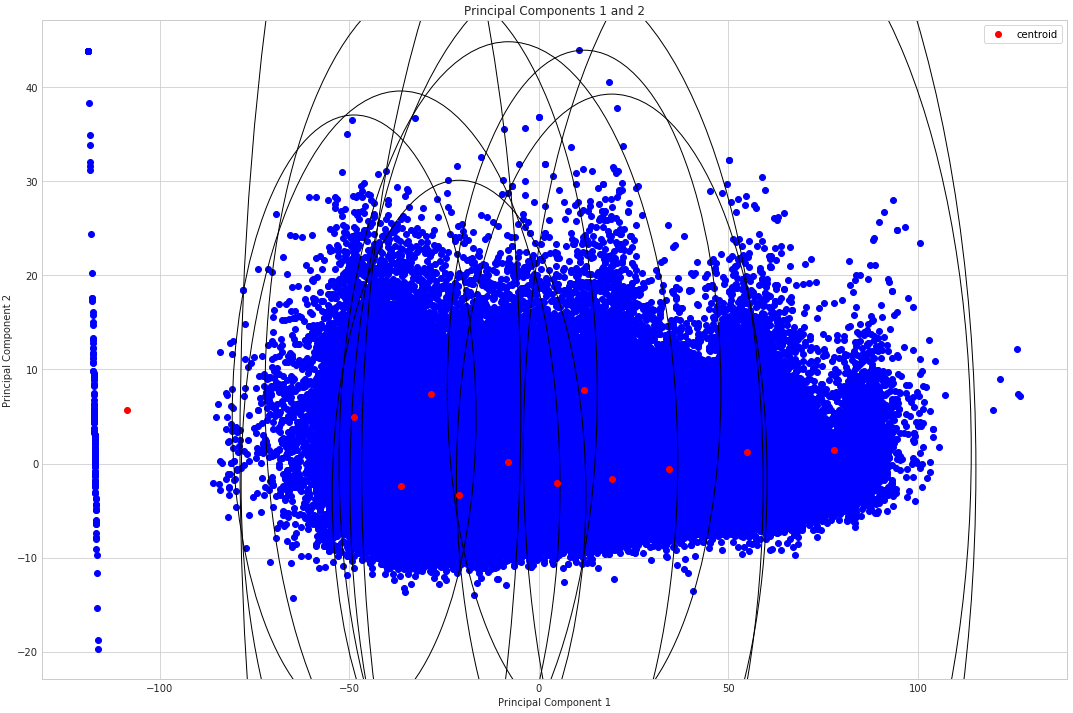

In [298]:
#Using the two functions together
plot_pca()
plot_kmeans()

In [299]:
centers

array([[ 4.29752524e-01,  4.52476514e-01,  5.45659529e-01,
         4.52476514e-01,  1.28287548e-01,  5.22347800e+00,
         2.14539828e-01, -1.04118904e+01,  7.14135021e-01,
         1.18214941e-01,  1.71966655e+02],
       [ 5.21327883e-01,  5.87675069e-01,  4.68205410e-01,
         5.87675069e-01,  1.62557956e-01,  5.18621098e+00,
         2.05466495e-01, -1.18761207e+01,  7.13828526e-01,
         8.41991900e-02,  1.08968324e+02],
       [ 5.54928686e-01,  5.02296111e-01,  4.49065692e-01,
         5.02296111e-01,  1.26956331e-01,  5.20627117e+00,
         2.12560379e-01, -1.03958902e+01,  7.13427292e-01,
         9.78641374e-02,  8.04383337e+01],
       [ 3.71559410e-01,  5.64699377e-01,  5.94629657e-01,
         5.64699377e-01,  1.03544006e-01,  5.21217114e+00,
         2.11683401e-01, -8.91437919e+00,  7.12917675e-01,
         7.15402512e-02,  1.36135151e+02],
       [ 4.15154787e-01,  4.24934044e-01,  5.74409151e-01,
         4.24934044e-01,  1.24025783e-01,  5.28446727e+00,
  

In [300]:
centers_2d

array([[  55.01265668,    1.25990614],
       [  -7.99365174,    0.18365123],
       [ -36.44093267,   -2.44118358],
       [  19.27086854,   -1.68550321],
       [  77.87384711,    1.4277837 ],
       [ -48.69040032,    4.90841681],
       [   4.70196124,   -2.10786422],
       [ -21.00946773,   -3.33207094],
       [ -28.37429153,    7.41928409],
       [-108.48929316,    5.64782549],
       [  11.96941102,    7.86696765],
       [  34.3037985 ,   -0.60571688]])

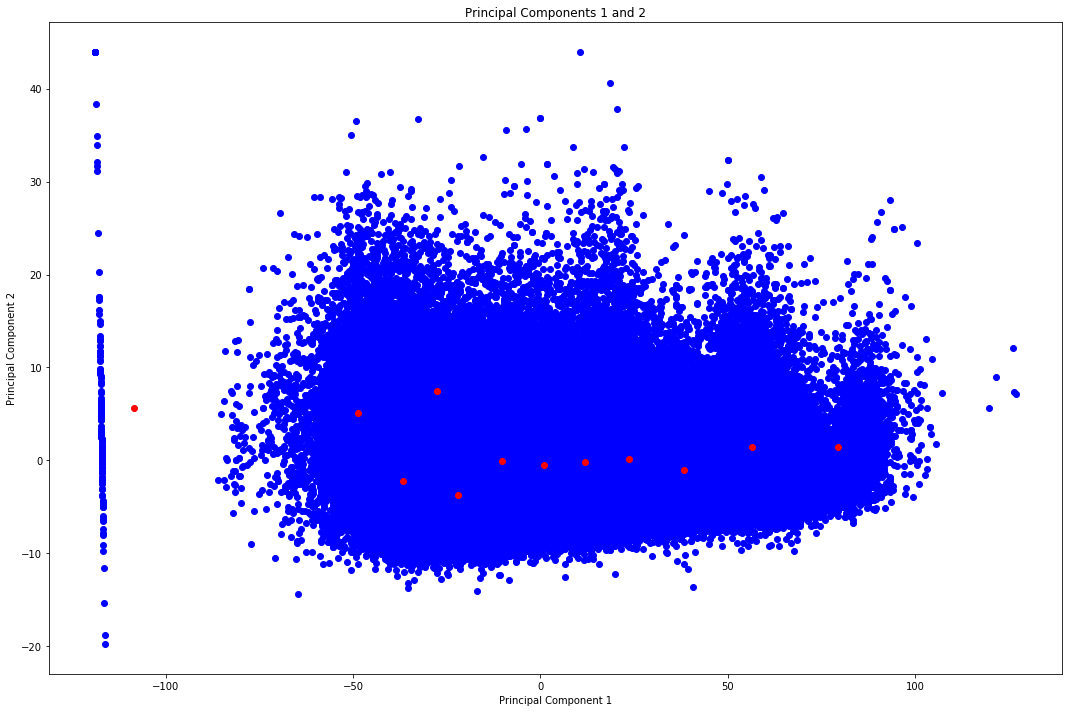

In [302]:
kmeans_2d = KMeans(n_clusters= 12)
kmeans_2d.fit(X_2d)
centers = kmeans_2d.cluster_centers_
#centers_2d


plt.figure(figsize=(15, 10))
     
plt.scatter([i[0] for i in X_2d], [i[1] for i in X_2d], c = 'b')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
    #plt.legend()
plt.title("Principal Components 1 and 2")
plt.tight_layout()
        
plt.plot(centers[:,0], centers[:,1], 'ro', label  = "centroid")

# for ind,i in zip(kmeans_2d.labels_,centers):
#         #print(ind)
        
       
#         #print(np.where(kmeans.labels_==ind)[0])
#     class_inds=np.where(kmeans_2d.labels_==ind)[0]
#     X_class = X_2d[class_inds]

#     dists = metrics.pairwise_distances([i], X_class)

#     max_dist=np.max(dists)
#         #print(max_dist)
#     plt.gca().add_artist(plt.Circle(i, max_dist, fill=False))
#     plt.legend()

Visualizing our clusters in 2d space will be pretty tough if this is all correct. You can't really tell the difference between . I think this is mostly attributed to the fact that this data does not work well in a 2-dimensional space. If the data is doomed for dimension reduction then how do we visualize our clusters and try to discern genre?

What if I up the number of clusters?

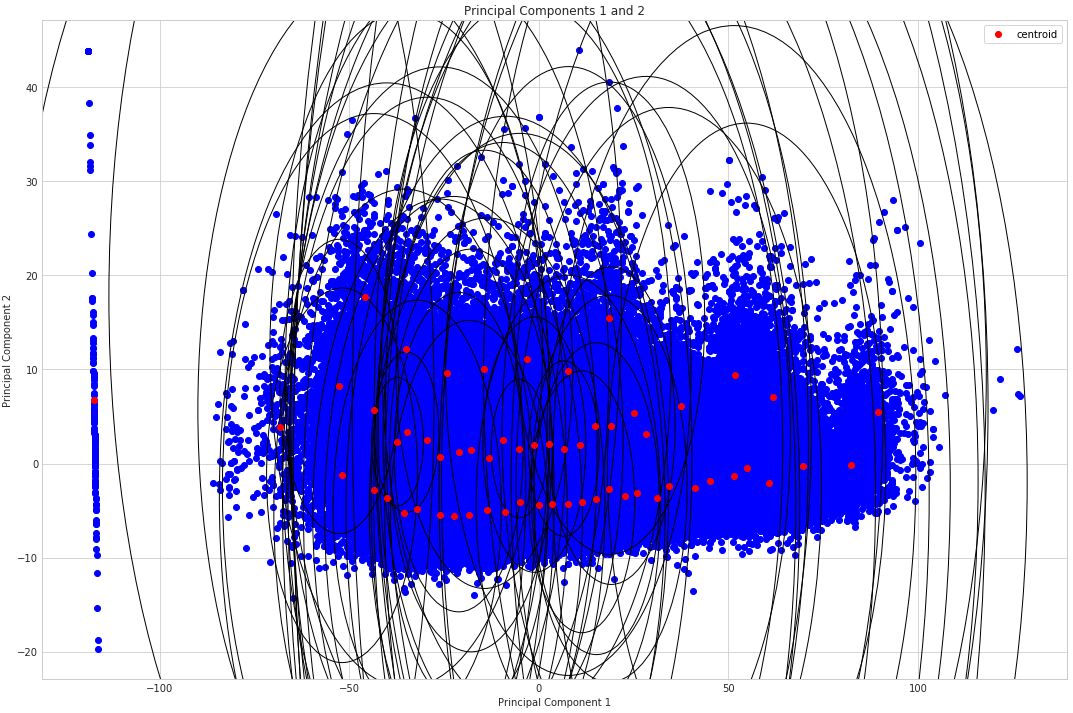

In [303]:
kmeans = KMeans(n_clusters= 60)
kmeans.fit(X)
centers = kmeans.cluster_centers_
centers_2d = pca.transform(centers)

plot_pca()
plot_kmeans()

Adding clusters doesn't do much, still getting massive circles.  Is my distance calculation correct? Also would be worth comparing circle functions to other people.

## Trying a different approach using the genre as a centroid

First we cut down our genre data to our genres of interest

In [304]:
df_genres.head()

,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.166667,5,1
1,[],0.679245,0.521473,2.298526e+05,0.401522,0.196737,0.221586,-12.679076,0.112267,112.025168,0.515920,21.682005,7,1
2,a cappella,0.621532,0.577017,1.936522e+05,0.345694,0.003799,0.127087,-12.770211,0.095324,111.813230,0.453186,43.351819,11,1
3,abstract,0.359395,0.459500,3.430185e+05,0.487000,0.791400,0.119480,-14.092000,0.043420,124.743200,0.304990,41.500000,1,1
4,abstract beats,0.353347,0.694400,2.338244e+05,0.613400,0.349403,0.102453,-6.699800,0.143453,119.398400,0.634187,58.600000,10,0


In [305]:
df_genres["genres"] = df_genres["genres"].apply(lambda x: x.replace("'", "").strip('][').split(', '))

df_genres = df_genres[[True if (len(df_genres.loc[i, "genres"]) == 1) else False for i in range(len(df_genres))]]
df_genres = df_genres.reset_index(drop = True)

In [306]:
popular_genres = ["classical", "pop", "country", "edm", "hip hop", "indie rock", "jazz", "k-pop", "metal", "oldies", "rap", "r&b", "rock"]

In [307]:
trimmed_genre_df = df_genres[[True if df_genres.loc[i,"genres"][0] in popular_genres else False for i in range(len(df_genres))]]
trimmed_genre_df.head()

,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
562,[classical],0.923837,0.316187,314582.982177,0.163788,0.576326,0.169262,-20.770300,0.054059,103.578738,0.236495,16.222614,7,1
631,[country],0.305335,0.588753,214728.878827,0.601206,0.015089,0.174485,-8.360418,0.049372,122.592254,0.566862,44.695854,7,1
871,[edm],0.114521,0.623411,233547.957598,0.755621,0.127587,0.195974,-5.716324,0.086654,125.921912,0.415068,58.104504,11,1
1166,[hip hop],0.165261,0.718704,246589.077134,0.664707,0.023867,0.214244,-7.562332,0.221819,111.720007,0.578925,49.573884,1,1
1234,[indie rock],0.231250,0.519347,243860.692456,0.663758,0.147294,0.188673,-7.714892,0.055238,123.672459,0.470674,48.376025,7,1


In [308]:


genre_X = trimmed_genre_df[['acousticness', 
       'danceability',
       'energy',
       'danceability', 
       'instrumentalness', 
       'key', 
       'liveness', 
       'loudness',
       'mode', 
       'speechiness', 
       'tempo']]

genre_y = trimmed_genre_df["genres"]
genre_2d = pca.transform(genre_X)

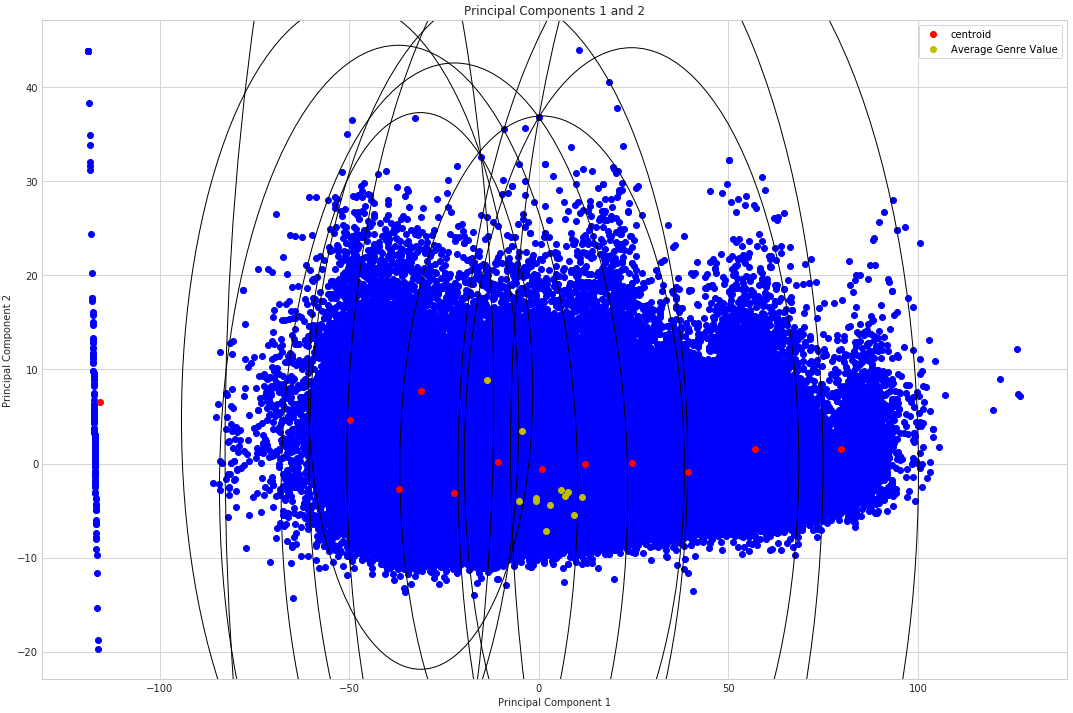

In [309]:
kmeans = KMeans(n_clusters= 12)
kmeans.fit(X)
centers = kmeans.cluster_centers_
centers_2d = pca.transform(centers)
plot_pca()
plot_kmeans()
plt.plot()
plt.plot(genre_2d[:,0], genre_2d[:,1], 'yo', label  = "Average Genre Value")
plt.legend()

In [310]:
genre_y.values[0][0]

'classical'

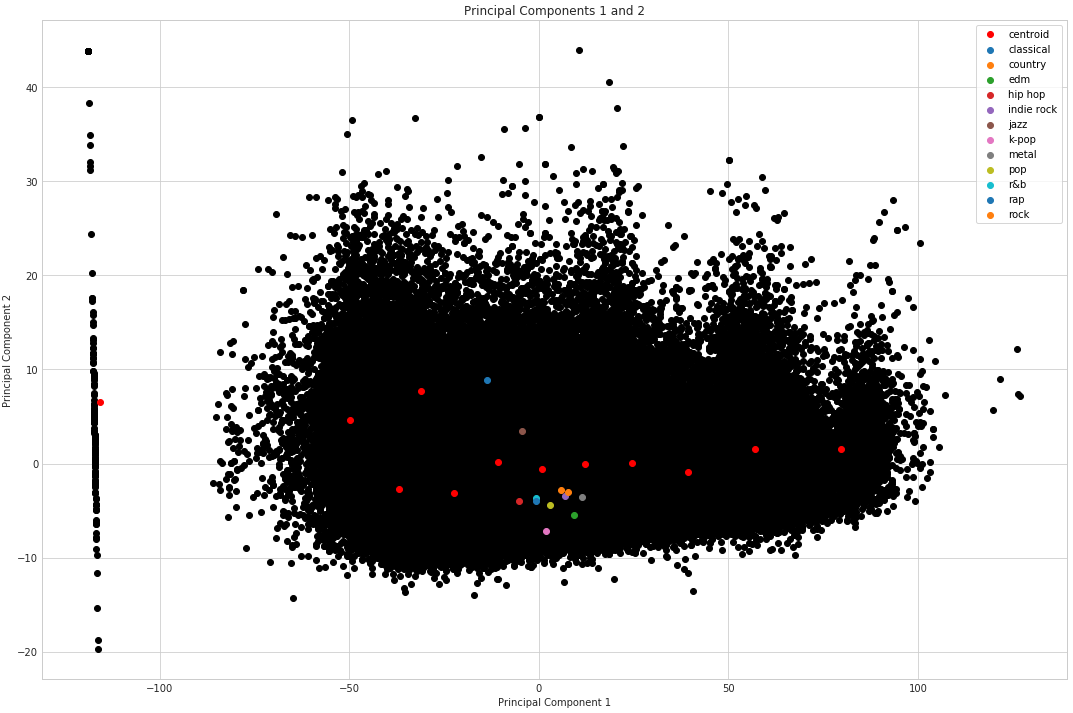

In [311]:
#Seeing where each of our cluster genres land to interpret associating clusters with genres later on 
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(15, 10))
         
    plt.scatter([i[0] for i in X_2d], [i[1] for i in X_2d], c = 'black')

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    #plt.legend()
    plt.title("Principal Components 1 and 2")
    plt.tight_layout()
#plt.plot(genre_2d[:,0], genre_2d[:,1], 'yo', label  = "Average Genre Value")
#plot_kmeans()
plt.plot(centers_2d[:,0], centers_2d[:,1], 'ro', label  = "centroid")

for i in range(len(genre_2d)):
    center = genre_2d[i]
    lab = genre_y.values[i][0]
    plt.scatter(center[0], center[1], label = lab)
plt.legend()

We can't visualize this very well in 2 dimensions, as these are values we can attribute to cluster centers and they are not clearly seperable. Additionally this data is at the song level 

In [312]:
centers = kmeans.cluster_centers_
genre_2d

array([[-13.73791613,   8.83463203],
       [  5.76231744,  -2.83026155],
       [  9.19782611,  -5.43571217],
       [ -5.07078939,  -3.93547001],
       [  6.86778478,  -3.43108438],
       [ -4.48187303,   3.49474672],
       [  1.97380948,  -7.1507607 ],
       [ 11.42026609,  -3.52070826],
       [  3.10251562,  -4.43228524],
       [ -0.75737062,  -3.71324292],
       [ -0.64344484,  -3.97260802],
       [  7.84294198,  -3.03008687]])

What I'm trying to do is give a name to each cluster center by attributing it to the nearest euclidean distance of our genres we want to learn from.

In [313]:
print(len(centers))
print(len(genre_X))

12
12


In [314]:
centers[0]

array([ 4.04419717e-01,  5.89527600e-01,  5.69578075e-01,  5.89527600e-01,
        9.67879313e-02,  5.31275120e+00,  2.06029389e-01, -9.15806952e+00,
        6.90340533e-01,  9.03152732e-02,  9.46180096e+01])

In [315]:
genre_X.iloc[0].values

array([ 9.23837226e-01,  3.16187146e-01,  1.63787641e-01,  3.16187146e-01,
        5.76325588e-01,  7.00000000e+00,  1.69262254e-01, -2.07702998e+01,
        1.00000000e+00,  5.40593228e-02,  1.03578738e+02])

In [318]:
#Making sure I can calculate euclidean distance in a 11-d space
distance.euclidean(centers[0], genre_X.iloc[0].values)

14.795193450650174

In [319]:
type(genre_y)

pandas.core.series.Series

Trying to see which genres are most similar to the clusters we are dealing with

In [320]:
len(centers[0])

11

In [321]:
#Calculating min distance and adding it into a list corresponding with the clusters
center_genre_names = []
for center in centers:
    
    min_dist = 1000000000
    min_genre = ""
    for i in range(len(genre_X)):
        genre = genre_y.values[i]
        row = genre_X.iloc[i]
        dist = distance.euclidean(row.values, center)
        if dist < min_dist:
            min_dist = dist
            min_genre = genre
    center_genre_names.append(min_genre)
        

center_genre_names

[['classical'],
 ['metal'],
 ['metal'],
 ['pop'],
 ['classical'],
 ['metal'],
 ['classical'],
 ['metal'],
 ['metal'],
 ['classical'],
 ['jazz'],
 ['classical']]

In [322]:
#Printing it out nicely
for i in range(len(centers)):
    print("Cluster ", str(i + 1), "is closest to the genre:", center_genre_names[i][0])

Cluster  1 is closest to the genre: classical
Cluster  2 is closest to the genre: metal
Cluster  3 is closest to the genre: metal
Cluster  4 is closest to the genre: pop
Cluster  5 is closest to the genre: classical
Cluster  6 is closest to the genre: metal
Cluster  7 is closest to the genre: classical
Cluster  8 is closest to the genre: metal
Cluster  9 is closest to the genre: metal
Cluster  10 is closest to the genre: classical
Cluster  11 is closest to the genre: jazz
Cluster  12 is closest to the genre: classical


Well it looks like our clusters get most focused around these genres, meaning they aren't picking up on any underlying patterns in the data. It is also possible that these underlying patterns don't exist, perhaps we can learn more by looking at supervised clustering (Isaac's work)

Seeing how things work if I turn the average values into cluster centers

In [323]:
kmeans = KMeans(n_clusters= 12)
kmeans.fit(X)
kmeans.cluster_centers_ = genre_X.values
centers = kmeans.cluster_centers_


In [324]:
centers == genre_X.values

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  Tr

[]

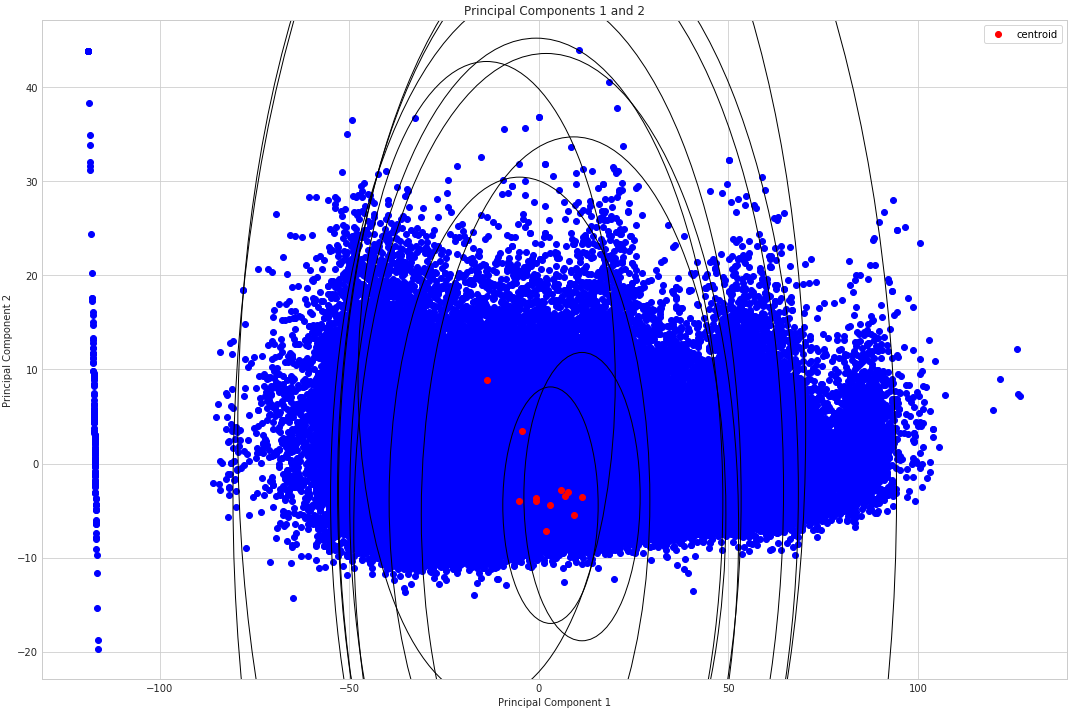

In [325]:
centers_2d = pca.transform(centers)
plot_pca()
plot_kmeans()
plt.plot()
# plt.plot(genre_2d[:,0], genre_2d[:,1], 'yo', label  = "Average Genre Value")
# plt.legend()

let's predict some songs with our clusters instantiated with set genres

In [326]:
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


In [327]:
def convert_df(df):
    return df[['acousticness', 
       'danceability',
       'energy',
       'danceability', 
       'instrumentalness', 
       'key', 
       'liveness', 
       'loudness',
       'mode', 
       'speechiness', 
       'tempo']]

In [328]:
#Let's try a quintessential rock song
br = df[df["name"] == "Bohemian Rhapsody"].iloc[4]
br_X = convert_df(br)
br_X.shape
br_X

acousticness           0.204
danceability           0.391
energy                 0.305
danceability           0.391
instrumentalness    1.38e-06
key                        0
liveness               0.217
loudness             -13.158
mode                       0
speechiness           0.0473
tempo                143.993
Name: 102836, dtype: object

In [329]:
# #br_X = np.array(br_X).reshape(1,-1)
# br_X  = br_X.copy(order='C')

In [330]:
# br_X = np.ascontiguousarray(br_X, dtype=np.float32)

In [331]:
# kmeans.predict(br_X.reshape(1,-1))

In [334]:
#kmeans.predict([br_X.values])

Getting some error when trying to predict a song, after trying to debug for a while not getting much.  It's okay though since the supervising clustering is still accomplished, and we know it wouldn't be very accurate.  This test was just for fun mostly. 